# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

# FUNCIÓN mult_dec_pi

In [71]:
from math import pi
def mult_dec_pi(a, b):
    
    if 1<=a<=15 and 1<=b<=15 :
        pi_dec = str(pi)[1:]
        dig_1  = int(pi_dec[a])
        dig_2  = int(pi_dec[b])
        result = dig_1 * dig_2
    else:
        result = 'Error'
    
    return result


In [72]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [73]:
mult_dec_pi(a=5, b=4)
# 45.0

45

In [74]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [75]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [76]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

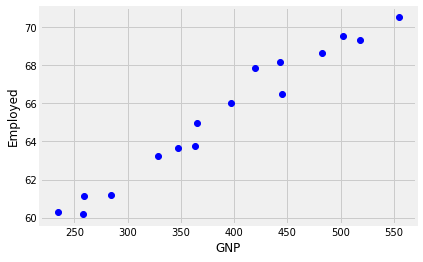

In [131]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

# MATRIZ DE DISEÑO X y VECTOR Y

In [153]:
#Matriz de diseño y Y
Y           = data[:,1]
n_samples   = Y.shape[0]
X           = np.c_[np.ones(n_samples), data[:,2]]  

# ESTIMACIÓN MATRICIAL DEL VECTOR BETA

In [155]:
#Estimación
beta        = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y
beta 

array([5.18435898e+01, 3.47522943e-02])

# PREDICCIÓN

In [157]:
emplyed_fit = beta[0]+beta[1]*data[:, 2]
emplyed_fit 

array([59.98567007, 60.8592385 , 60.81155835, 61.734058  , 63.27622581,
       63.90260117, 64.54155685, 64.46256489, 65.65654946, 66.41105653,
       67.2308284 , 67.29258322, 68.61866127, 69.31012767, 69.8512904 ,
       71.1274294 ])

# PLOT DE LA REGRESIÓN

Text(0,0.5,'Employed')

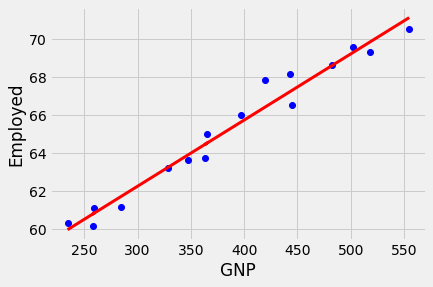

In [158]:
#Plot de la regresión
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.plot(data[:, 2], emplyed_fit, 'r', lw=3)
plt.xlabel("GNP")
plt.ylabel("Employed")

# PARÁMETROS DE LA REGRESIÓN

In [159]:
print("Parámetros")
print("Beta0 = "+ str(beta[0]))
print("Beta1 = "+ str(beta[1]))

Parámetros
Beta0 = 51.843589781884454
Beta1 = 0.03475229434762876


# Exercise 01.3

Analyze the baby names dataset using pandas

In [86]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [8]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [9]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [11]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

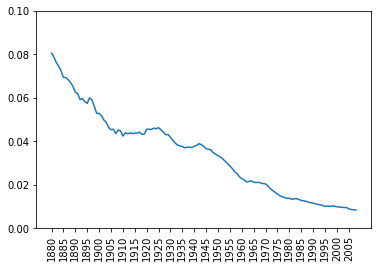

In [14]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

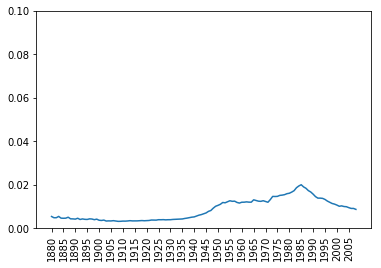

In [15]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [138]:
boys         = names[names.sex == 'boy'].copy()   
most_popular = boys ["name"].value_counts()

most_popular.head()

Jerry        129
Frederick    129
Philip       129
David        129
Clinton      129
Name: name, dtype: int64

# Exercise 01.4

Which has been the most popular girl name?


In [140]:
girls              = names[names.sex == 'girl'].copy()   
most_popular_girls = girls ["name"].value_counts()
most_popular_girls.head()


Nina        129
Maria       129
Margaret    129
Caroline    129
Marie       129
Name: name, dtype: int64

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [151]:
girls                      = names[names.sex == 'girl'].copy() 
new_girls                  = girls[girls['year'] == 2000]
most_popular_new_girl_name = new_girls ["name"].value_counts()
print(most_popular_new_girl_name.head())


Ashlyn       1
Charity      1
Christine    1
Kallie       1
Odalys       1
Name: name, dtype: int64
